In [17]:
import gc

import pandas as pd
import numpy as np

import tensorflow as tf

import keras
from keras import models
from keras import activations

from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Data load

In [3]:
df = pd.read_csv('data/Estimar_UH2021_clean.txt', parse_dates=[0])

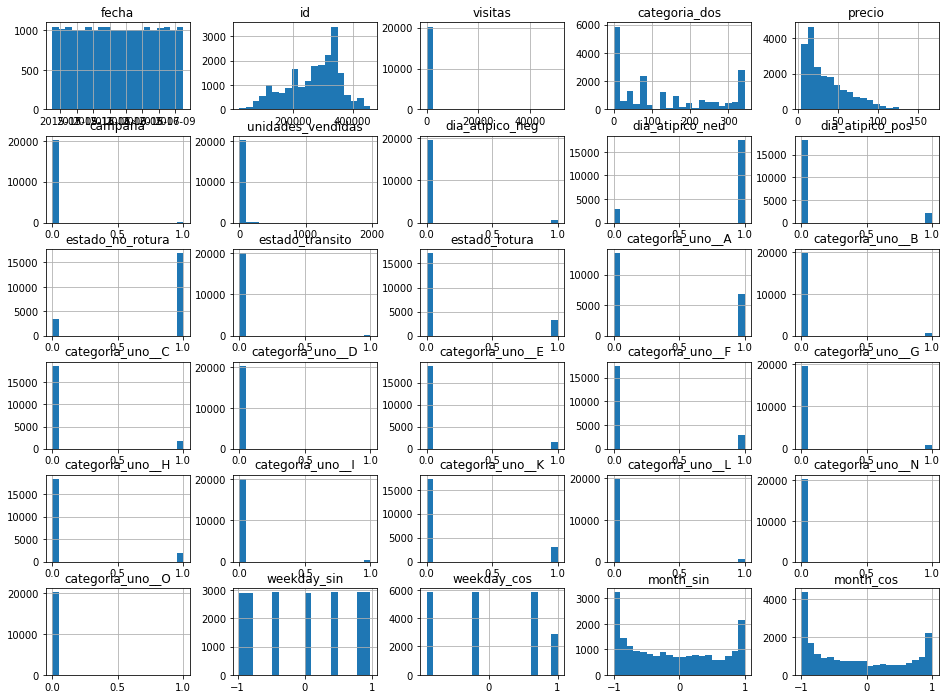

In [4]:
_ = df[::100].hist(bins=20, figsize=[16,12])

## Data Preprocessing

In [4]:
df.dropna(inplace=True)
df['categoria_dos'] = df['categoria_dos'].astype(str).str.replace('.0','')

df_categoria_dos_onehot = pd.get_dummies(df.categoria_dos, prefix='categoria_dos_')

df = pd.concat([df, df_categoria_dos_onehot], axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split

X_cols = ['visitas', 'precio', 'campaña',
    'dia_atipico_neg', 'dia_atipico_neu',
    'dia_atipico_pos', 'estado_no_rotura', 'estado_transito',
    'estado_rotura', 'categoria_uno__A', 'categoria_uno__B',
    'categoria_uno__C', 'categoria_uno__D', 'categoria_uno__E',
    'categoria_uno__F', 'categoria_uno__G', 'categoria_uno__H',
    'categoria_uno__I', 'categoria_uno__K', 'categoria_uno__L',
    'categoria_uno__N', 'categoria_uno__O',
    'categoria_dos__0', 'categoria_dos__1',
    'categoria_dos__114', 'categoria_dos__115', 'categoria_dos__116',
    'categoria_dos__122', 'categoria_dos__123', 'categoria_dos__124',
    'categoria_dos__125', 'categoria_dos__127', 'categoria_dos__131',
    'categoria_dos__133', 'categoria_dos__135', 'categoria_dos__136',
    'categoria_dos__137', 'categoria_dos__139', 'categoria_dos__14',
    'categoria_dos__143', 'categoria_dos__144', 'categoria_dos__145',
    'categoria_dos__149', 'categoria_dos__152', 'categoria_dos__153',
    'categoria_dos__155', 'categoria_dos__156', 'categoria_dos__157',
    'categoria_dos__158', 'categoria_dos__16',  'categoria_dos__161',
    'categoria_dos__165', 'categoria_dos__171', 'categoria_dos__174',
    'categoria_dos__175', 'categoria_dos__179', 'categoria_dos__181',
    'categoria_dos__182', 'categoria_dos__183', 'categoria_dos__186',
    'categoria_dos__188', 'categoria_dos__192', 'categoria_dos__195',
    'categoria_dos__197', 'categoria_dos__199', 'categoria_dos__2',
    'categoria_dos__212', 'categoria_dos__216', 'categoria_dos__217',
    'categoria_dos__22',  'categoria_dos__221', 'categoria_dos__223',
    'categoria_dos__224', 'categoria_dos__226', 'categoria_dos__228',
    'categoria_dos__229', 'categoria_dos__23',  'categoria_dos__233',
    'categoria_dos__235', 'categoria_dos__236', 'categoria_dos__237',
    'categoria_dos__238', 'categoria_dos__239', 'categoria_dos__242',
    'categoria_dos__243', 'categoria_dos__245', 'categoria_dos__247',
    'categoria_dos__248', 'categoria_dos__249', 'categoria_dos__253',
    'categoria_dos__255', 'categoria_dos__256', 'categoria_dos__258',
    'categoria_dos__259',    'categoria_dos__263',    'categoria_dos__264',
    'categoria_dos__266',    'categoria_dos__267',    'categoria_dos__268',
    'categoria_dos__269',    'categoria_dos__27',    'categoria_dos__271',
    'categoria_dos__273',    'categoria_dos__274',    'categoria_dos__275',
    'categoria_dos__276',    'categoria_dos__277',    'categoria_dos__278',
    'categoria_dos__28',    'categoria_dos__282',    'categoria_dos__285',
    'categoria_dos__286',    'categoria_dos__289',    'categoria_dos__29',
    'categoria_dos__292',    'categoria_dos__295',    'categoria_dos__296',
    'categoria_dos__298',    'categoria_dos__3',    'categoria_dos__312',
    'categoria_dos__314',    'categoria_dos__315',    'categoria_dos__316',
    'categoria_dos__319',    'categoria_dos__32',    'categoria_dos__323',
    'categoria_dos__326',    'categoria_dos__328',    'categoria_dos__329',
    'categoria_dos__331',    'categoria_dos__333',    'categoria_dos__336',
    'categoria_dos__338',    'categoria_dos__34',    'categoria_dos__341',
    'categoria_dos__342',    'categoria_dos__343',    'categoria_dos__36',
    'categoria_dos__37',    'categoria_dos__38',    'categoria_dos__39',
    'categoria_dos__4',    'categoria_dos__42',    'categoria_dos__43',
    'categoria_dos__44',    'categoria_dos__45',    'categoria_dos__46',
    'categoria_dos__49',    'categoria_dos__5',    'categoria_dos__51',
    'categoria_dos__54',    'categoria_dos__57',    'categoria_dos__6',
    'categoria_dos__63',    'categoria_dos__65',    'categoria_dos__66',
    'categoria_dos__67',    'categoria_dos__69',    'categoria_dos__7',
    'categoria_dos__71',    'categoria_dos__72',    'categoria_dos__73',
    'categoria_dos__75',    'categoria_dos__76',    'categoria_dos__78',
    'categoria_dos__79',    'categoria_dos__8',    'categoria_dos__82',
    'categoria_dos__84',    'categoria_dos__85',    'categoria_dos__86',
    'categoria_dos__89',    'categoria_dos__9',    'categoria_dos__92',
    'categoria_dos__93',    'categoria_dos__95',    'categoria_dos__96',
    'categoria_dos__97',    'categoria_dos__98',
    'weekday_sin', 'weekday_cos', 'month_sin', 'month_cos'
]

y_col = ['unidades_vendidas']

X = df[X_cols]
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [6]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scl = X_train
X_test_scl = X_test

X_train_scl[['visitas','precio']] = X_scaler.fit_transform(X_train[['visitas','precio']])
X_test_scl[['visitas','precio']] = X_scaler.transform(X_test[['visitas','precio']])

y_train_scl = y_scaler.fit_transform(y_train)
y_test_scl = y_scaler.transform(y_test)

In [21]:
X_train.describe().round(3)

,visitas,precio,campaña,dia_atipico_neg,dia_atipico_neu,dia_atipico_pos,estado_no_rotura,estado_transito,estado_rotura,categoria_uno__A,...,categoria_dos__92,categoria_dos__93,categoria_dos__95,categoria_dos__96,categoria_dos__97,categoria_dos__98,weekday_sin,weekday_cos,month_sin,month_cos
count,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,...,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000,1774974.000
mean,0.000,0.000,0.005,0.035,0.863,0.102,0.834,0.013,0.153,0.344,...,0.001,0.002,0.000,0.000,0.005,0.001,0.004,-0.003,-0.110,-0.181
std,1.000,1.000,0.067,0.183,0.344,0.303,0.372,0.113,0.360,0.475,...,0.035,0.045,0.016,0.015,0.073,0.035,0.707,0.707,0.678,0.704
min,-0.209,-1.203,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.975,-0.901,-1.000,-1.000
25%,-0.201,-0.798,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.782,-0.901,-0.766,-0.866
50%,-0.170,-0.325,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.223,-0.185,-0.342
75%,-0.069,0.549,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.782,0.623,0.485,0.485
max,197.643,5.163,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,0.975,1.000,1.000,1.000


In [22]:
y_train.describe().round(3)

,unidades_vendidas
count,1774974.000
mean,3.744
std,19.744
min,0.000
25%,0.000
50%,0.000
75%,3.000
max,4881.000


# NN Model

In [68]:
y = np.array([0, 3, 1], dtype=np.float32)
yhat = np.array([0, 0, 10], dtype=np.float32)

# K.mean(K.clip(yt-(yp-1), 0, 1))

K.mean(K.clip(yhat-y, 0, 1))
# cf(yt,yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.33333334>

In [75]:
from keras import backend as K
from tensorflow import convert_to_tensor

# KERAS RMSE
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
    
# CAJAMAR SCORING
def rrmse(y, yhat):
    return K.sqrt( K.mean(K.square(y - yhat)) ) / K.mean(y)

def cf(y, yhat):
    return K.mean(K.clip(yhat-y, 0, 1))

def inverse_cf(y, yhat):
    return 1 - K.mean(K.clip(yhat-y, 0, 1))

def score(y,yhat):
    return (0.7 * rrmse(y,yhat)) + (0.3 * (1 - cf(y,yhat)))

In [70]:
gc.collect()

13127

In [78]:
from keras.layers import Dense, Dropout

FEAT_DIM = len(X.columns)

gc.collect()

model = models.Sequential()
model.add(Dense(FEAT_DIM*16, input_dim=FEAT_DIM, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(FEAT_DIM*8, activation='relu'))
model.add(Dropout(0.1))
# model.add(Dense(FEAT_DIM*16, activation='relu'))
#model.add(Dense(FEAT_DIM*8, activation='relu'))
model.add(Dense(FEAT_DIM*2, activation='relu'))
# model.add(Dense(FEAT_DIM*2, activation='relu'))
# OUTPUT
model.add(Dense(1, activation="linear"))


# Early Stopping
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# es = keras.callbacks.EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=50)
# Store best model
mc = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

model.compile(loss="mse", optimizer='adam', metrics=[cf, rrmse, score])

history = model.fit(X_train_scl, y_train_scl, epochs=1000, batch_size=200,
    callbacks=[es, mc],
    validation_data=(X_test_scl, y_test_scl)
)

Epoch 1/1000
8874/8875 [============================>.] - ETA: 0s - loss: 0.6546 - cf: 0.0919 - rrmse: 4.1687 - score: 3.1905
Epoch 00001: val_loss improved from inf to 0.51434, saving model to best_model.h5
8875/8875 [==============================] - 39s 4ms/step - loss: 0.6546 - cf: 0.0919 - rrmse: 4.1756 - score: 3.1954 - val_loss: 0.5143 - val_cf: 0.0892 - val_rrmse: 5.3481 - val_score: 4.0169
Epoch 2/1000
8873/8875 [============================>.] - ETA: 0s - loss: 0.5891 - cf: 0.0921 - rrmse: 4.8632 - score: 3.6766
Epoch 00002: val_loss did not improve from 0.51434
8875/8875 [==============================] - 39s 4ms/step - loss: 0.5890 - cf: 0.0921 - rrmse: 4.8553 - score: 3.6711 - val_loss: 0.5560 - val_cf: 0.0668 - val_rrmse: 4.4428 - val_score: 3.3900
Epoch 3/1000
8874/8875 [============================>.] - ETA: 0s - loss: 0.5661 - cf: 0.0867 - rrmse: 3.6907 - score: 2.8575
Epoch 00003: val_loss did not improve from 0.51434
8875/8875 [==============================] - 38s 4

8872/8875 [============================>.] - ETA: 0s - loss: 0.4722 - cf: 0.0807 - rrmse: 2.3820 - score: 1.9432
Epoch 00022: val_loss did not improve from 0.37646
8875/8875 [==============================] - 38s 4ms/step - loss: 0.4721 - cf: 0.0807 - rrmse: 2.3819 - score: 1.9431 - val_loss: 0.4146 - val_cf: 0.0684 - val_rrmse: 4.2874 - val_score: 3.2807
Epoch 23/1000
8875/8875 [==============================] - ETA: 0s - loss: 0.4572 - cf: 0.0809 - rrmse: 5.0795 - score: 3.8314
Epoch 00023: val_loss did not improve from 0.37646
8875/8875 [==============================] - 38s 4ms/step - loss: 0.4572 - cf: 0.0809 - rrmse: 5.0795 - score: 3.8314 - val_loss: 0.3915 - val_cf: 0.0817 - val_rrmse: 4.2003 - val_score: 3.2157
Epoch 24/1000
8871/8875 [============================>.] - ETA: 0s - loss: 0.4764 - cf: 0.0806 - rrmse: 1.0192 - score: 0.9893
Epoch 00024: val_loss improved from 0.37646 to 0.36561, saving model to best_model.h5
8875/8875 [==============================] - 38s 4ms/step

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=200,
    callbacks=[es, mc],
    validation_data=(X_test, y_test)
)

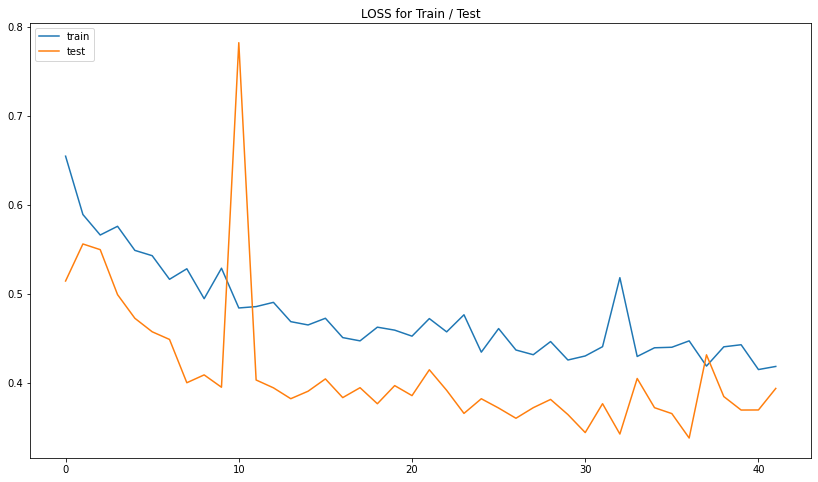

In [79]:
plt.figure(figsize=[14,8])
# plt.ylim((0.85,0.98))

plt.title('LOSS for Train / Test')

train_acc = history.history['loss']
test_acc = history.history['val_loss']

plt.plot(train_acc)
plt.plot(test_acc)
# plt.plot([max(train_acc)] * len(train_acc))
# plt.plot([max(test_acc)] * len(test_acc))

plt.legend(['train', 'test'], loc='upper left')

## Model Scoring

In [80]:
from keras.models import load_model

best_model = load_model('best_model.h5', compile = False)

y_hat = best_model.predict(X_test)

In [97]:
def rrmse(y,yhat):
    return np.sqrt(np.sum(np.power(y-yhat,2))/y.shape[0])/y.mean()

def cf(y,yhat):
    rotura=np.where(yhat>y,1,0)
    return rotura.mean()

def score(y,yhat):
    return (0.7*rrmse(y,yhat))+(.3*(1-cf(y,yhat)))

y_hat_real = y_scaler.inverse_transform(y_hat)
y_hat_real += np.where(y_hat_real == 0, 1, 1)

score(y_test.values, y_hat_real.round(0))

2.2541292892507796

In [83]:
y_hat_real.round()[:20]

array([[ 3.],
       [ 1.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 6.],
       [ 1.],
       [ 7.],
       [ 2.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 2.],
       [ 2.],
       [16.],
       [10.],
       [ 5.],
       [ 7.],
       [ 3.],
       [20.]], dtype=float32)